### Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.rename(columns={'Unnamed: 0' : 'State'}, inplace = True)

In [5]:
crime = crime[['State', 'UrbanPop', 'Murder', 'Assault', 'Rape']]

In [6]:
# EDA on crime data set
crime.head(5)

,State,UrbanPop,Murder,Assault,Rape
0,Alabama,58,13.2,236,21.2
1,Alaska,48,10.0,263,44.5
2,Arizona,80,8.1,294,31.0
3,Arkansas,50,8.8,190,19.5
4,California,91,9.0,276,40.6


In [7]:
crime.tail(5)

,State,UrbanPop,Murder,Assault,Rape
45,Virginia,63,8.5,156,20.7
46,Washington,73,4.0,145,26.2
47,West Virginia,39,5.7,81,9.3
48,Wisconsin,66,2.6,53,10.8
49,Wyoming,60,6.8,161,15.6


In [8]:
crime.describe()

,UrbanPop,Murder,Assault,Rape
count,50.000000,50.00000,50.000000,50.000000
mean,65.540000,7.78800,170.760000,21.232000
std,14.474763,4.35551,83.337661,9.366385
min,32.000000,0.80000,45.000000,7.300000
25%,54.500000,4.07500,109.000000,15.075000
50%,66.000000,7.25000,159.000000,20.100000
75%,77.750000,11.25000,249.000000,26.175000
max,91.000000,17.40000,337.000000,46.000000


In [9]:
crime.columns

Index(['State', 'UrbanPop', 'Murder', 'Assault', 'Rape'], dtype='object')

In [10]:
crime.shape

(50, 5)

In [11]:
crime.sample(5)

,State,UrbanPop,Murder,Assault,Rape
26,Nebraska,62,4.3,102,16.5
27,Nevada,81,12.2,252,46.0
24,Missouri,70,9.0,178,28.2
15,Kansas,66,6.0,115,18.0
2,Arizona,80,8.1,294,31.0


In [12]:
crime.query('Assault < UrbanPop')

,State,UrbanPop,Murder,Assault,Rape
10,Hawaii,83,5.3,46,20.2
14,Iowa,57,2.2,56,11.3
48,Wisconsin,66,2.6,53,10.8


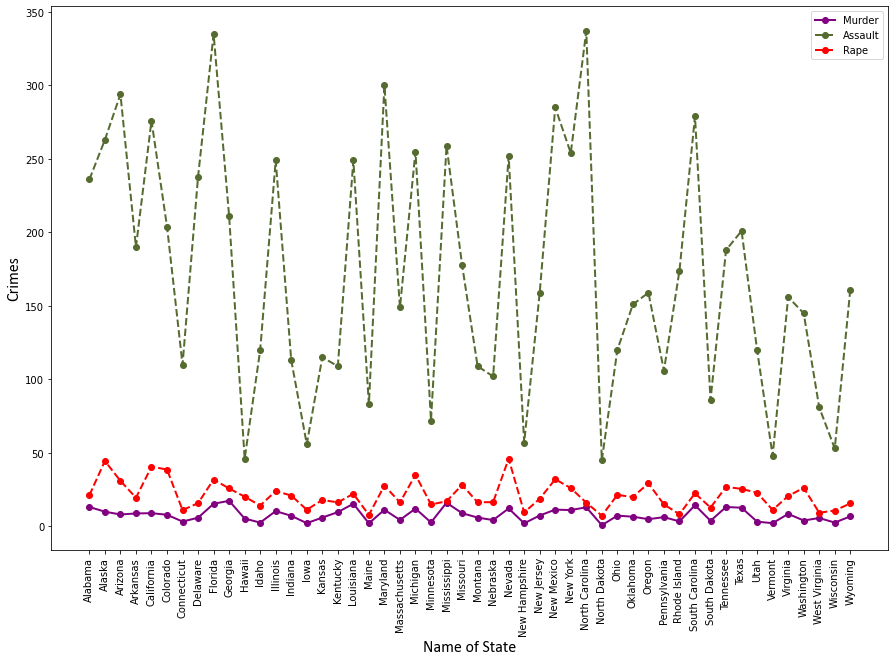

In [13]:
# Visualize data
plt.figure(figsize=(15, 10))
plt.plot('State', 'Murder', data = crime, marker = 'o', color = 'purple', linewidth = 2)
plt.plot('State', 'Assault', data = crime, marker = 'o', color = 'darkolivegreen', linewidth = 2, linestyle = 'dashed')
plt.plot('State', 'Rape', data = crime, marker = 'o', color = 'red', linewidth = 2, linestyle = 'dashed')
plt.xlabel('Name of State', fontname = "Calibri", fontsize = 16)
plt.ylabel('Crimes', fontname = "Calibri", fontsize = 16)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [14]:
#crime_rate['Total'] = crime_rate.apply(lambda row: row['Murder'] + row['Assault'] + row['Rape'], axis=1)
crime['Total'] = crime[['Murder', 'Assault', 'Rape']].sum(axis = 1)
crime.head()

,State,UrbanPop,Murder,Assault,Rape,Total
0,Alabama,58,13.2,236,21.2,270.4
1,Alaska,48,10.0,263,44.5,317.5
2,Arizona,80,8.1,294,31.0,333.1
3,Arkansas,50,8.8,190,19.5,218.3
4,California,91,9.0,276,40.6,325.6


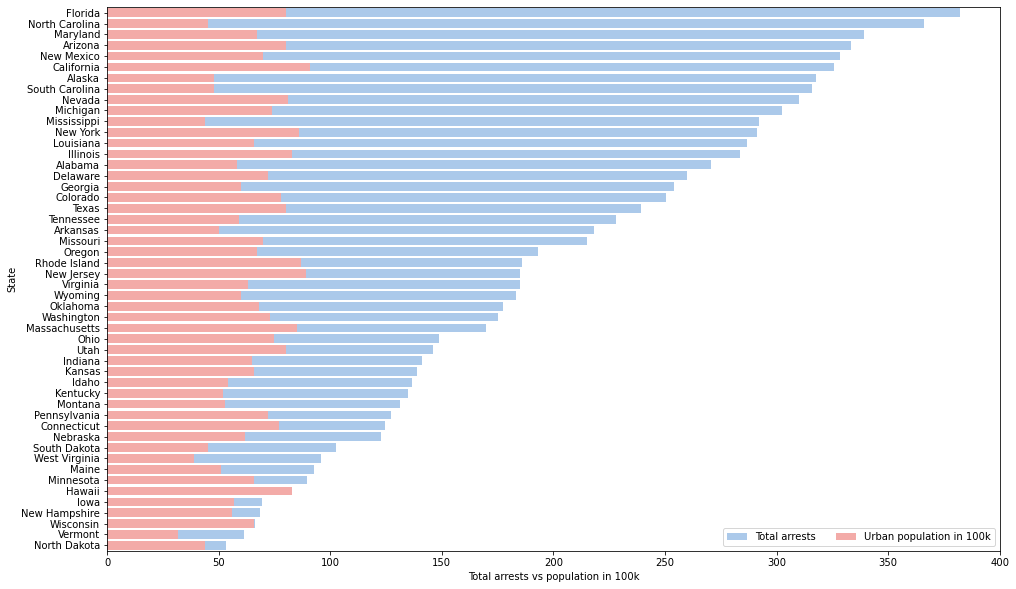

In [15]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize = (16, 10))

# Load the dataset
stats = crime.sort_values("Total", ascending = False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x = "Total", y = "State", data = stats, label = "Total arrests", color = "b")

# Plot the population
sns.barplot(x = "UrbanPop", y = "State", data = stats, label = "Urban population in 100k", color = "r")

# Add a legend and informative axis label
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0, 400), ylabel = "State", xlabel = "Total arrests vs population in 100k");

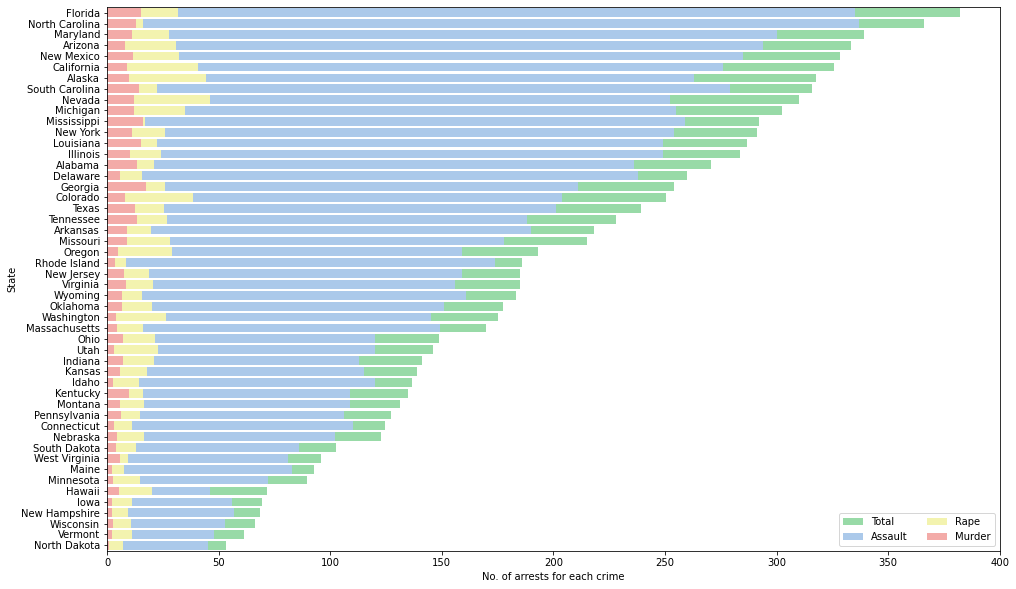

In [16]:
f, ax = plt.subplots(figsize = (16, 10))

stats = crime.sort_values("Total", ascending = False)

sns.set_color_codes("pastel")

sns.barplot(x = "Total", y = "State", data = stats, label = "Total", color = "g")

sns.barplot(x = "Assault", y = "State", data = stats, label = "Assault", color = "b")

sns.barplot(x = "Rape", y = "State", data = stats, label = "Rape", color = "y")

sns.barplot(x = "Murder", y = "State", data = stats, label = "Murder", color = "r")

# Add a legend and informative axis label
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0, 400), ylabel = "State", xlabel = "No. of arrests for each crime");

In [17]:
crime_rate = crime[['State', 'UrbanPop', 'Murder', 'Assault', 'Rape']]
crime_rate.set_index(['State'], inplace = True)
crime_rate.head()

,UrbanPop,Murder,Assault,Rape
State,,,,
Alabama,58,13.2,236,21.2
Alaska,48,10.0,263,44.5
Arizona,80,8.1,294,31.0
Arkansas,50,8.8,190,19.5
California,91,9.0,276,40.6


In [18]:
from sklearn.preprocessing import normalize
crime_rate_scaled = normalize(crime_rate)
crime_rate_scaled = pd.DataFrame(crime_rate_scaled, columns = crime_rate.columns)
crime_rate_scaled.head()

,UrbanPop,Murder,Assault,Rape
0,0.237411,0.054031,0.966016,0.086778
1,0.176987,0.036872,0.969739,0.164081
2,0.261122,0.026439,0.959624,0.101185
3,0.252998,0.044528,0.961392,0.098669
4,0.309972,0.030657,0.940134,0.138295


In [19]:
import scipy.cluster.hierarchy as sch

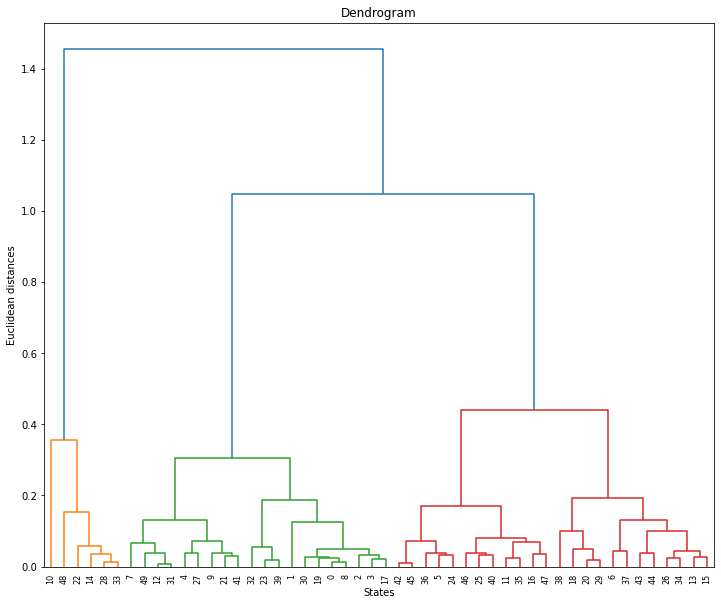

In [20]:
plt.figure(figsize = (12, 10))  
dend = sch.dendrogram(sch.linkage(crime_rate_scaled, method = 'ward'))
plt.title("Dendrogram")  
plt.axhline(y = 6, color = 'r', linestyle = '--')
#dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [22]:
y_hc=hc.fit_predict(crime_rate_scaled)
y_hc

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(crime_rate_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

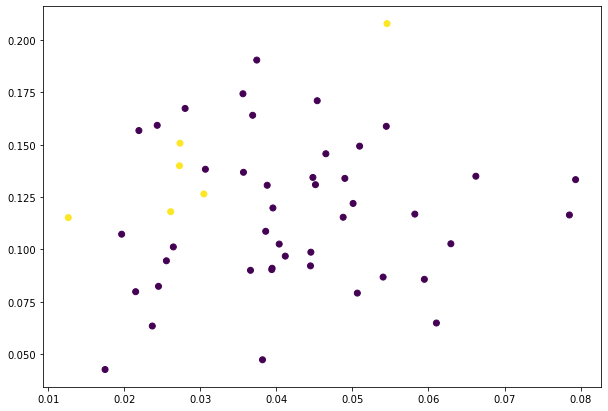

In [24]:
plt.figure(figsize = (10, 7))  
plt.scatter(crime_rate_scaled['Murder'], crime_rate_scaled['Rape'], c = cluster.labels_)

In [25]:
# Standardize the data to normal distribution
from sklearn import preprocessing

crime_rates_standardized = preprocessing.scale(crime_rate)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[-0.52619514  1.25517927  0.79078716 -0.00345116]
 [-1.22406668  0.51301858  1.11805959  2.50942392]
 [ 1.00912225  0.07236067  1.49381682  1.05346626]
 [-1.08449238  0.23470832  0.23321191 -0.18679398]
 [ 1.77678094  0.28109336  1.2756352   2.08881393]
 [ 0.86954794  0.02597562  0.40290872  1.88390137]
 [ 0.79976079 -1.04088037 -0.73648418 -1.09272319]
 [ 0.45082502 -0.43787481  0.81502956 -0.58583422]
 [ 1.00912225  1.76541475  1.99078607  1.1505301 ]
 [-0.38662083  2.22926518  0.48775713  0.49265293]
 [ 1.21848371 -0.57702994 -1.51224105 -0.11129987]
 [-0.80534376 -1.20322802 -0.61527217 -0.75839217]
 [ 1.21848371  0.60578867  0.94836277  0.29852525]
 [-0.03768506 -0.13637203 -0.70012057 -0.0250209 ]
 [-0.5959823  -1.29599811 -1.39102904 -1.07115345]
 [ 0.03210209 -0.41468229 -0.67587817 -0.34856705]
 [-0.94491807  0.44344101 -0.74860538 -0.53190987]
 [ 0.03210209  1.76541475  0.94836277  0.10439756]
 [-1.01470522 -1.31919063 -1.06375661 -1.44862395]
 [ 0.10188925  0.81452136  1.56

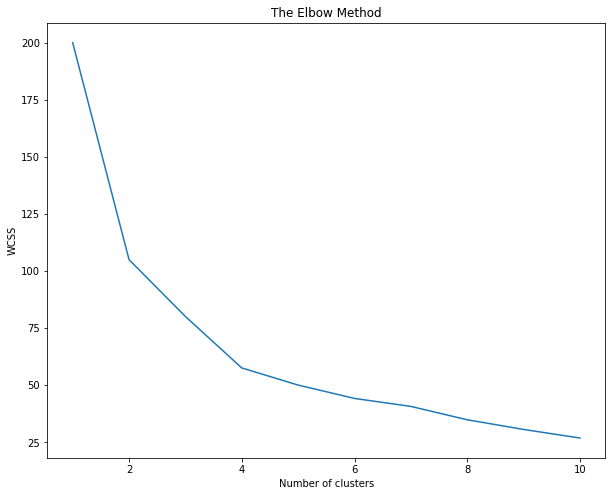

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [28]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans + 1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime_rate['cluster'] = cluster

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rate.groupby('cluster').mean(),1))
kmeans_mean_cluster

,UrbanPop,Murder,Assault,Rape
cluster,,,,
1,53.8,13.9,243.6,21.4
2,73.9,5.7,138.9,18.8
3,52.1,3.6,78.5,12.2
4,76.0,10.8,257.4,33.2


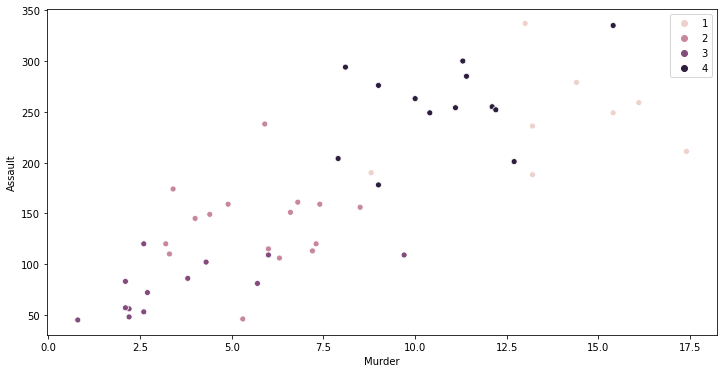

In [30]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x = crime_rate['Murder'], y = crime_rate['Assault'], hue = y_kmeans1)

In [31]:
crime_rate[crime_rate['cluster'] == 1]

,UrbanPop,Murder,Assault,Rape,cluster
State,,,,,
Alabama,58,13.2,236,21.2,1
Arkansas,50,8.8,190,19.5,1
Georgia,60,17.4,211,25.8,1
Louisiana,66,15.4,249,22.2,1
Mississippi,44,16.1,259,17.1,1
North Carolina,45,13.0,337,16.1,1
South Carolina,48,14.4,279,22.5,1
Tennessee,59,13.2,188,26.9,1
